In [29]:
pip install wordcloud


[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [30]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
from bootcampviztools import plot_categorical_relationship_fin, pinta_distribucion_categoricas, plot_grouped_histograms,\
    plot_grouped_boxplots, plot_combined_graphs, plot_categorical_numerical_relationship, bubble_plot,\
        grafico_dispersion_con_correlacion
from scipy.stats import chi2_contingency, mannwhitneyu
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from wordcloud import WordCloud

In [2]:
df= pd.read_csv("amazon_cleaned.csv")

Chart 1 saved as 'best_selling_books_part_1.png'


/var/folders/1h/kvjqjlx908g4mdp8fc29vsb40000gr/T/ipykernel_41903/1440729441.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk['Year_Str'] = chunk['Amazon_year'].astype(str)
/var/folders/1h/kvjqjlx908g4mdp8fc29vsb40000gr/T/ipykernel_41903/1440729441.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


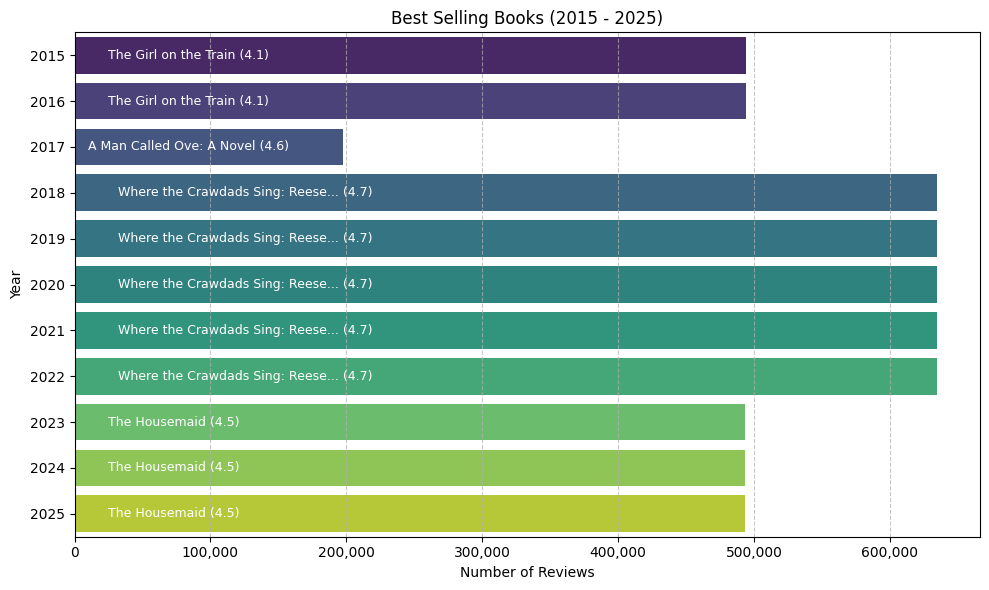

In [14]:
# Identify the best-selling book per year based on maximum reviews
best_selling_per_year = df.loc[df.groupby("Amazon_year")["Reviews"].idxmax()]
# Sort by year for consistent plotting
best_selling_per_year = best_selling_per_year.sort_values("Amazon_year")

# Function to truncate long titles
def truncate_title(title, max_length=30):
    if len(title) > max_length:
        return title[:max_length] + "..."
    return title

# Add truncated titles for display
best_selling_per_year['Short_Title'] = best_selling_per_year['Title'].apply(lambda x: truncate_title(x))

# Split the data into chunks of 5 years each
def plot_multiple_charts(data, years_per_plot=11):
    # Use smaller chunks to prevent image size errors
    years_per_plot = min(11, years_per_plot)  # Ensure at most 5 years per plot
    
    # Process each chunk separately rather than creating a large figure with subplots
    chunks = []
    for i in range(0, len(data), years_per_plot):
        chunks.append(data.iloc[i:i+years_per_plot])
    
    # Create a separate figure for each chunk
    for i, chunk in enumerate(chunks):
        # Create a new figure with fixed dimensions
        plt.figure(figsize=(10, 6))
        
        # Create barplot for this chunk - fixed to horizontal orientation
        # Convert year to string to avoid treating it as a continuous variable
        chunk['Year_Str'] = chunk['Amazon_year'].astype(str)
        
        # Create the bar plot
        ax = sns.barplot(
            data=chunk,
            x="Reviews",
            y="Year_Str",  # Use string version of year
            palette="viridis"
        )
        
        # Add annotations for book titles and ratings
        for j, (_, row) in enumerate(chunk.iterrows()):
            plt.text(
                row["Reviews"] * 0.05,  # Position text at 5% of the bar length
                j,  # Y position
                f"{row['Short_Title']} ({row['Rating']:.1f})",
                va="center",
                fontsize=9,
                color='white'  # Make text white for better visibility on colored bars
            )
        
        # Set titles and labels
        year_range = f"{chunk['Amazon_year'].min()} - {chunk['Amazon_year'].max()}"
        plt.title(f"Best Selling Books ({year_range})")
        plt.xlabel("Number of Reviews")
        plt.ylabel("Year")
        
        # Add grid lines for better readability
        plt.grid(axis='x', linestyle='--', alpha=0.7)
        
        # Format x-axis with comma separators for large numbers
        ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))
        
        # Save this chunk to a separate file
        plt.tight_layout()
        print(f"Chart {i+1} saved as 'best_selling_books_part_{i+1}.png'")
        
        # Show the plot
        plt.show()

# Example usage:
plot_multiple_charts(best_selling_per_year)

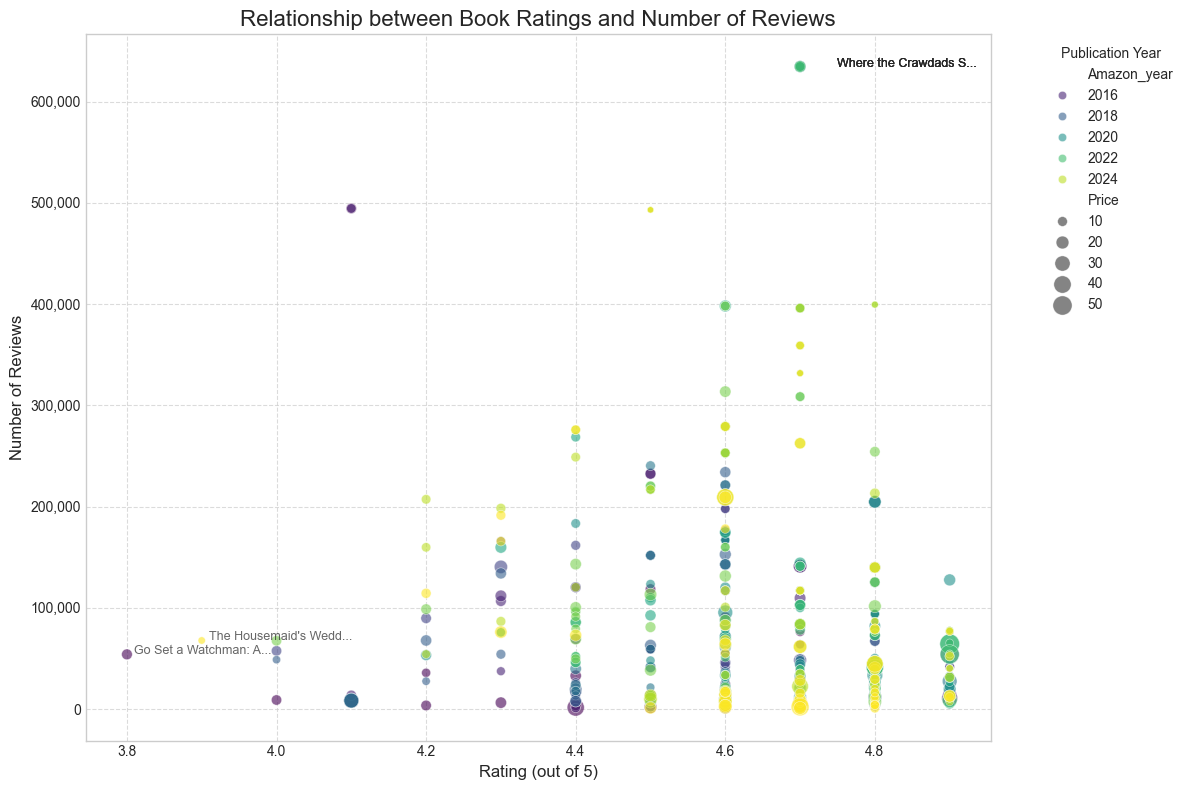

In [24]:
# Create a scatter plot showing the relationship between ratings and reviews
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# Create a scatter plot showing the relationship between ratings and reviews
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set the style for the plot
plt.style.use('seaborn-v0_8-whitegrid')

# Create figure with appropriate size
plt.figure(figsize=(12, 8))

# Create the scatter plot
scatter = sns.scatterplot(
    data=df,
    x="Rating",
    y="Reviews",
    alpha=0.6,  # Add some transparency
    hue="Amazon_year",  # Color points by year
    palette="viridis",  # Use a colorful palette
    size="Price",  # Vary point size by book price
    sizes=(20, 200),  # Range of point sizes
    legend="brief"
)




# Add labels for some notable outliers (books with extremely high reviews or unusual ratings)
top_reviewed = filtered_df.nlargest(5, 'Reviews')
for idx, row in top_reviewed.iterrows():
    plt.text(
        row['Rating'] + 0.05,
        row['Reviews'],
        truncate_title(row['Title'], 20),
        fontsize=9,
        alpha=0.7
    )

min_reviewed = filtered_df.nsmallest(2, "Rating")
for idx, row in min_reviewed.iterrows():
    plt.text(
        row['Rating'] + 0.01,
        row['Reviews'],
        truncate_title(row['Title'], 20),
        fontsize=9,
        alpha=0.7
    )

# Format y-axis with comma separators for large numbers
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))

# Add titles and labels
plt.title("Relationship between Book Ratings and Number of Reviews", fontsize=16)
plt.xlabel("Rating (out of 5)", fontsize=12)
plt.ylabel("Number of Reviews", fontsize=12)

# Adjust the legend
plt.legend(title="Publication Year", bbox_to_anchor=(1.05, 1), loc='upper left')

# Add grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Improve layout
plt.tight_layout()

# Show the plot
plt.show()

/var/folders/1h/kvjqjlx908g4mdp8fc29vsb40000gr/T/ipykernel_41903/3513159732.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=cat_stats, x='Categories', y='Rating', palette="Set1")


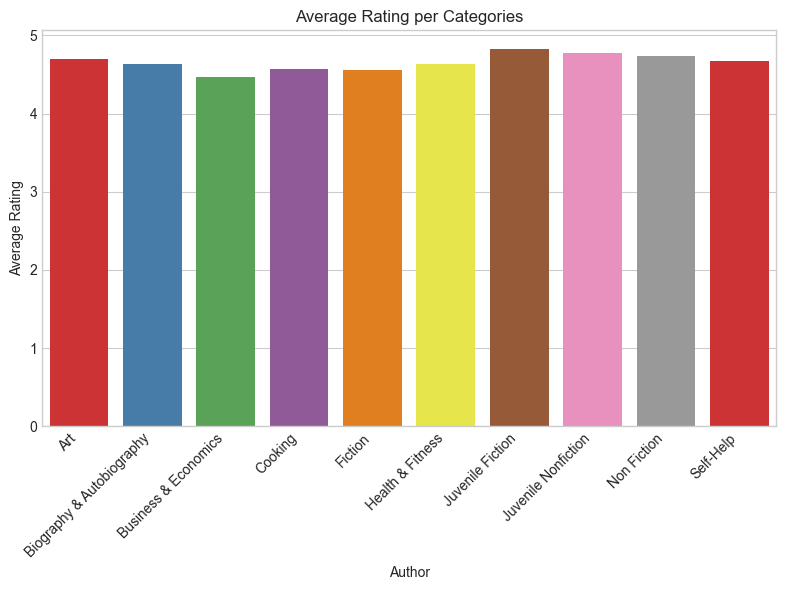

In [27]:
# Identify top 10 categories by frequency
top_cat = df['Categories'].value_counts().nlargest(10).index
df_top_cat = df[df['Categories'].isin(top_cat)]

# Group and calculate mean of metrics
cat_stats = df_top_cat.groupby('Categories')[['Rating', 'Price', 'Reviews']].mean().reset_index()

#Rating
plt.figure(figsize=(8, 6))
sns.barplot(data=cat_stats, x='Categories', y='Rating', palette="Set1")
plt.title('Average Rating per Categories')
plt.xlabel('Author')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha= "right")
plt.tight_layout()
plt.show()

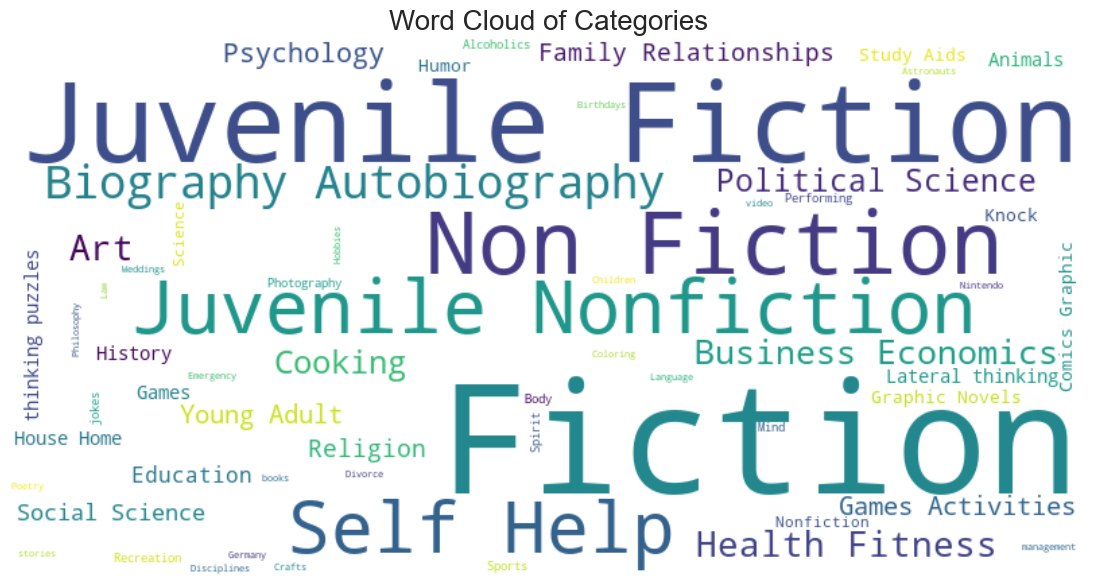

In [32]:
#WORDCLOUD

# Combine all titles into one string for the word cloud
text = " ".join(df['Categories'].dropna().astype(str))

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(text)

# Plot the word cloud
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Categories", fontsize=20)
plt.show()

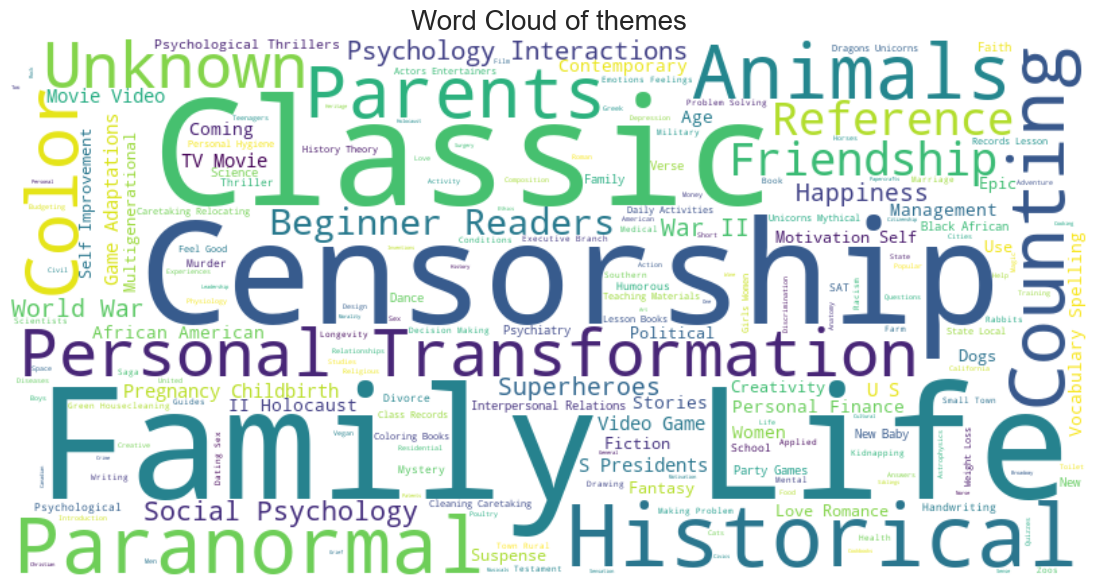

In [33]:
#WORDCLOUD

# Combine all titles into one string for the word cloud
text = " ".join(df['Theme'].dropna().astype(str))

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(text)

# Plot the word cloud
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of themes", fontsize=20)
plt.show()

/var/folders/1h/kvjqjlx908g4mdp8fc29vsb40000gr/T/ipykernel_41903/3173508026.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bestseller_counts.index, y=bestseller_counts.values, palette='viridis')


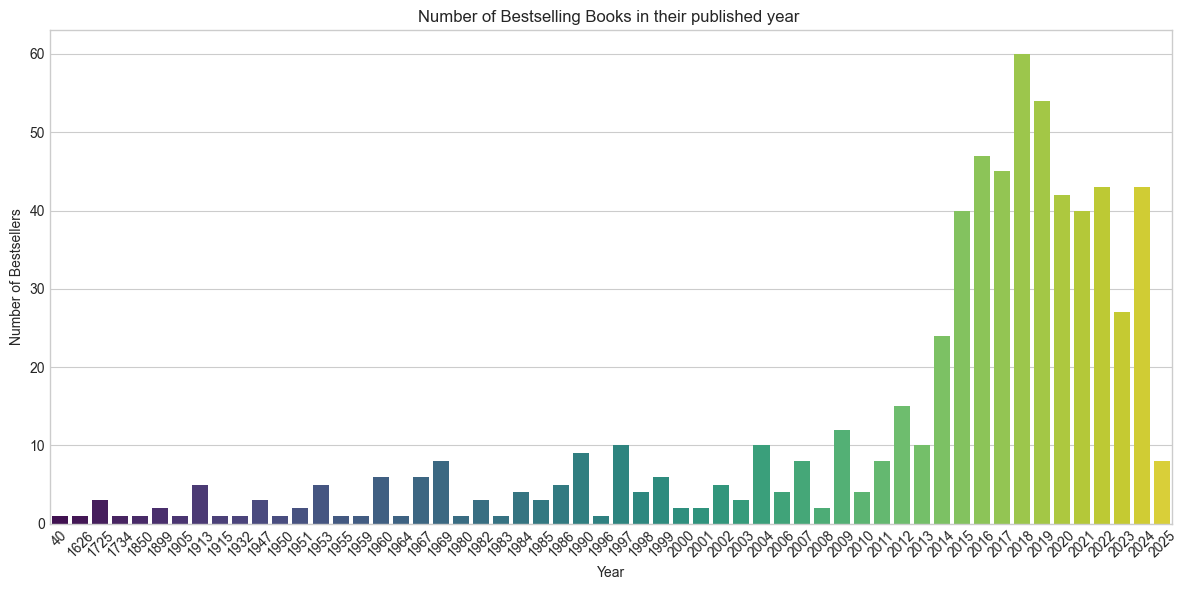

In [37]:



# Count number of bestsellers per year
bestseller_counts = df['Year'].value_counts().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x=bestseller_counts.index, y=bestseller_counts.values, palette='viridis')
plt.title('Number of Bestselling Books in their published year ')
plt.xlabel('Year')
plt.ylabel('Number of Bestsellers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
